
#Prediction Using Supervised Ml

#Task1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:
data.shape

(25, 2)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [15]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [17]:
# display missing value
missing_values=data.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
Hours     0
Scores    0
dtype: int64


<Figure size 1000x600 with 0 Axes>

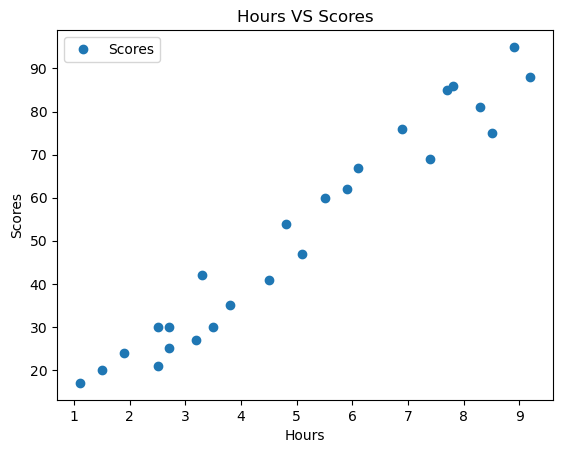

In [10]:
# Plot using the original categorical values
plt.figure(figsize=(10, 6))
data.plot(x='Hours', y='Scores',style='o')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours VS Scores')
plt.show()

<Axes: >

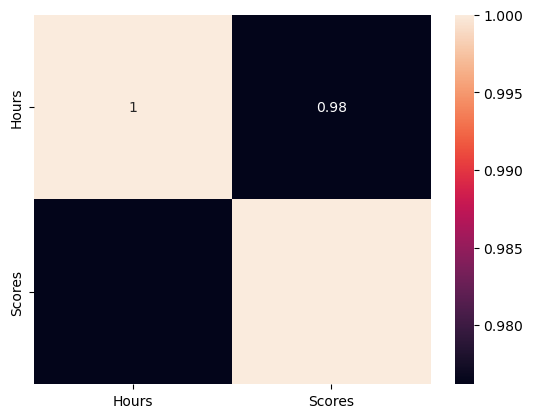

In [24]:
sns.heatmap(data.corr(),annot=True)

In [34]:
y = data['Scores']
X = data.drop('Scores',axis=1)

In [36]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [37]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"r2 score: {r2}")

Mean Squared Error: 18.943211722315272
Mean Absolute Error: 3.9207511902099244
Root Mean Squared Error: 4.352380006653288
r2 score: 0.9678055545167994


In [53]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


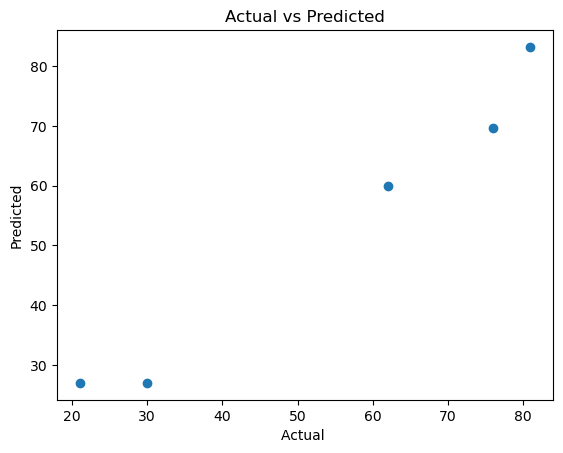

In [54]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual ")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()